# Imports

Import any additional libraries you need below without deleting any existing imports.
</br>
Make sure that the test Python files required for this notebook are located right beside this notebook file.

In [6]:
from scipy import linalg
import numpy as np
from math import copysign
from PIL import Image
from numpy import asarray
from sklearn.utils.extmath import randomized_svd
import requests
import matplotlib.pyplot as plt
import time
from test1 import test_lu
from test2 import test_QR
from test3 import test_rsvd

# Random State
For code reproducibility, we will set the random state of NumPy.

In [5]:
np.random.RandomState(0)

RandomState(MT19937) at 0x7FF670D90640

# LU Decomposition
In the following cell, you should implement the LU decomposition for the input matrix. The number of empty lines below suggests the number of lines needed for a possible solution.

In [7]:
# This function performs the LU decomposition of the matrix from scratch
def lu(A):
    ######### your code here #########







    ##################################
    return L, U

In [8]:
# Scipy LU Decomposition
def slu(A):
    L , U = linalg.lu(A, permute_l=True)
    return L, U

To test your LU decomposition code, please run the following cell. It contains test cases to verify the correctness of your implementation.

In [9]:
test_lu(lu)

Test 1: Passed!
---------------
Test 2: Passed!
---------------
Test 3: Passed!
---------------


# QR Decomposition
In the following cell, you should implement the QR decomposition for the input matrix. The number of empty lines below suggests the number of lines needed for a possible solution.

In [ ]:
def QR_Decomposition(A):
    n, m = A.shape  # get the shape of A
    # TODO: initialize empty matrix Q,u of shape (n,n)
    ######### your code here #########


    ##################################
    u[:, 0] = A[:, 0]
    Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0])

    for i in range(1, n):
        u[:, i] = A[:, i]
        for j in range(i):
            # TODO: Calculate p as the matrix product of A[:, i] and Q[:, j]
            # Subtract p times Q[:, j] from u[:, i]
            ######### your code here #########
            u[:,i] -= None
            ##################################
        # TODO: Normalize the u[:, i] vector to obtain the e vector for Q[:, i]
        ######### your code here #########
        Q[:,i] = None
        ##################################

    R = np.zeros((n, m))
    for i in range(n):
        for j in range(i, m):
            # TODO: Calculate the elements of R by taking the inner product between A[:, j] and Q[:, i]
            ######### your code here #########
            R[i,j] = None
            ##################################
    return Q, R

Here is the scipy function for QR decomposition

In [14]:
def sqr(A):
    Q, R = linalg.qr(A,mode="economic")
    return Q, R

do not change the following cell

In [15]:
def unify_signs(L):
    Q,R = L
    D = np.diag(np.sign(np.diag(Q)))
    Q[:, :] = Q @ D
    R[:, :] = D @ R
    return Q,R

In order to test your QR decomposition code, please run the following cell. It contains test cases to verify the correctness of your implementation.

In [16]:
test_QR(QR_Decomposition,sqr,unify_signs)

Test1: Passed!
Test2: Passed!
Test3: Passed!
Test4: Passed!


# Truncate the SVD

In [17]:
# This function performs svd using linalg from scipy
def truncated_svd(A, k):
    u, s, vh = linalg.svd(A, full_matrices=False)
    return u[:,:k], s[:k], vh[:k,:]

# Randomized SVD

In the following cell, you should implement the randomized SVD for the input matrix. The number of empty lines below suggests the number of lines needed for a possible solution.

In [18]:
# This function performs randomized svd using linalg from scipy
def rsvd(A, n_components, random_state, n_oversamples, n_iter):
  # Sample column space of X with P matrix
  ny = A.shape[1]
  # TODO: set the random state of numpy
  ######### your code here #########

  ##################################
  # TODO: Generate a random matrix P of shape (ny,n_components+n_oversamples)
  ######### your code here #########
  P = None
  ##################################
  Z = A @ P
  # TODO: for n_iter iterations, computes A multiplied by A transpose multiplied by Z
  ######### your code here #########


  ##################################
  Q,R = sqr(Z)
  # Step 2: Compute SVD on projected Y = Q.T @ X, name them U1,S,VT
  ######### your code here #########


  ##################################
  U = Q @ U1
  
  return U[:, :n_components], S[:n_components], VT[:n_components, :]


In the following cell, implement the rsvd as you did before but this time use the LU decomposition instead of the multiplication of matrices.

In [19]:
# Using lu insted of multiplication (can be quite unstable try different random seeds if needed)
def nrsvd(A, n_components, random_state, n_oversamples, n_iter):
  ######### your code here #########
  
  
 
 
 


 

  ##################################
  return U[:, :n_components], S[:n_components], VT[:n_components, :]

This function performs the randomized SVD of sklearn library. Do not change this cell.

In [20]:
def srsvd(A, n_components, random_state, n_oversamples, n_iter):
  U, s, Vh = randomized_svd(A, n_components=n_components, random_state=random_state, n_oversamples=n_oversamples, n_iter=n_iter)
  return U[:, :n_components], s[:n_components], Vh[:n_components, :]


In order to test your randomized SVD code, please run the following cell. It contains test cases to verify the correctness of your implementation.

In [21]:
test_rsvd(srsvd,rsvd)

srsvd test 1: error: 0.728, time: 2.327
srsvd test 2: error: 0.486, time: 1.376
srsvd test 3: error: 0.769, time: 2.673
srsvd test 4: error: 0.823, time: 2.037
-------------------------------
Test1, Alg rsvd: Passed! 
 with Error 0.729 and time 1.766 
 ------------------
Test2, Alg rsvd: Passed! 
 with Error 0.486 and time 0.645 
 ------------------
Test3, Alg rsvd: Passed! 
 with Error 0.769 and time 1.748 
 ------------------
Test4, Alg rsvd: Passed! 
 with Error 0.823 and time 1.457 
 ------------------


# Cat Test
Here you can visualize the result of various svd methods on a cat image. You can also compare the time it takes for each method to run.

In [22]:
url = 'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?cs=srgb&dl=pexels-pixabay-45201.jpg&fm=jpg'
img = Image.open(requests.get(url, stream=True).raw)

rgb_image = asarray(img)
gray_image = np.average(rgb_image, axis=2, weights=[0.2989, 0.5870, 0.1140])

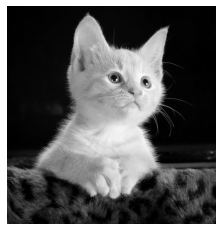

In [ ]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [24]:
def show_images(im,k):
  start_time = time.time()
  U, s, Vh = linalg.svd(im)
  image1 = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]
  t1 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = rsvd(im,k,0,10,4)
  image2 = U @ np.diag(s) @ Vh
  t2 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = nrsvd(im,k,0,10,4)
  image3 = U @ np.diag(s) @ Vh
  t3 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = srsvd(im,k,0,10,4)
  image4 = U @ np.diag(s) @ Vh
  t4 = time.time()-start_time

  fig, axes = plt.subplots(nrows=2, ncols=2)

  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(f'svd, t = {t1:.2f}s')
  axes[0, 0].axis('off')
  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(f'rsvd, t = {t2:.2f}s')
  axes[0, 1].axis('off')
  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(f'nrsvd, t = {t3:.2f}s')
  axes[1, 0].axis('off')
  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(f'srsvd, t = {t4:.2f}s')
  axes[1, 1].axis('off')

  plt.tight_layout()
  plt.show()



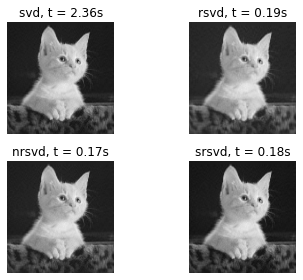

In [25]:
show_images(gray_image,50)